In [303]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import CRISPR_Kinetic_model as CRISPR
reload(CRISPR);

import sys 
sys.path.append('../code_Boyle/')
import plotting_Boyle as plt_B 
reload(plt_B);

import seaborn as sns 
sns.set_style('ticks');
default_colors = sns.color_palette();

import plotsettings
publishable = plotsettings.Set('Cell')


# Adjust all text and axes colors to black. default is some studip gray that appears to faint when printed 
from matplotlib import rc , rcParams
rc('axes',edgecolor='black')
rc('xtick',color='black',labelsize=15)
rc('ytick',color='black',labelsize=15)
rc('text',color='black')
rc('axes',labelcolor='black',linewidth=2.0)
rc('font',size=15)
rcParams["patch.force_edgecolor"] = True

/Users/mklein1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


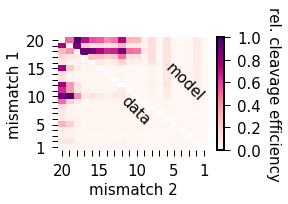

In [307]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/13_9_2018/fit_13_9_2018_sim_O.txt'
Nparams = 44
parameters = plt_B.load_simm_anneal(filename, Nparams)


rate_to_cleave = 0.0001
rate_to_cleave = 0.1  


mismatch_positions =[]
Delta = CRISPR.translate_binding_to_cleaving(parameters, model_id, rate_to_cleave, mismatch_positions)
landscape = CRISPR.get_transition_landscape(Delta)
on_target = CRISPR.Pclv(Delta)

# plt.plot(landscape, marker='o',markersize=10)


two_mismatches = np.zeros((20,20))

mask = np.ones((20,20))
for mm1 in range(20):
    for mm2 in range(mm1+1,20):
        mismatch_positions= [mm1+1,mm2+1]
        Delta = CRISPR.translate_binding_to_cleaving(parameters, model_id, rate_to_cleave, mismatch_positions)
        landscape = CRISPR.get_transition_landscape(Delta)
        two_mismatches[mm2,mm1] = CRISPR.Pclv(Delta)/on_target
        mask[mm2,mm1] = 0.0

        


plt.figure()
axHeatmap = sns.heatmap(two_mismatches, mask=mask,cbar=False, cmap='RdPu', vmin=0, vmax=1)


# fldr = '/Users/mklein1/Documents/PhD_Martin_Depken_Group/PredictionTool_CLV/data/'
# Pattanayak = pd.read_excel(fldr+'Pattanayak_training_data/Pattanayak_Liu_NBT_2673_Data.xlsx')
# concentration = '100nM'
# PAM = 'NGG'
# Pattanayak = Pattanayak[(Pattanayak.Concentration == concentration) & 
#                         (Pattanayak.PAM == PAM) & (Pattanayak.name == 'CLTA1')]
# Pattanayak.name.unique()
# up_to_2_mm = Pattanayak[(Pattanayak['target - MMcount'] == 1) | (Pattanayak['target - MMcount'] == 2)]
# up_to_2_mm.groupby('target - MMpos')['Score'].median()


'''
Experiment
'''
x1 = np.arange(1,21)
x2 = np.arange(1,21)
two_mm = up_to_2_mm[Pattanayak['target - MMcount']==2].groupby('target - MMpos').median()
Matrix = np.zeros([20,20]) 
for name in two_mm.index:
    pos1 = int(str(name).split(',')[0]) -1
    pos2 = int(str(name).split(',')[1]) -1 
    Matrix[pos1,pos2] = two_mm.loc[name]['Score']   
mask = np.zeros(Matrix.shape)
mask[np.tril_indices_from(mask)] = True
axHeatmap = sns.heatmap(Matrix,cbar=False,mask=mask,cmap='RdPu',vmin=0,vmax=1)


axHeatmap.invert_xaxis()
axHeatmap.invert_yaxis()
axHeatmap.set_yticklabels([20,'','','','',
                           15,'','','','',
                           10,'','','','',
                           5,'','','',
                           1] );
axHeatmap.set_xticklabels([1,'','','',
                           5,'','','','',
                           10,'','','','',
                           15,'','','','',
                           20] ,rotation=0);

axHeatmap.set_ylabel('mismatch 1',fontsize=15);
axHeatmap.set_xlabel('mismatch 2',fontsize=15);

cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15);
cbar.set_label('rel. cleavage efficiency',size=15,rotation=-90,labelpad=20,color='black')


axHeatmap.text(x=6.,y=6., s='model',rotation=-45,fontsize=15)
axHeatmap.text(x=12.,y=12., s='data',rotation=-45,fontsize=15)

plt.savefig('../data/BN_forum_22_10_2018/From_Boyle_to_Pattanayak_two_mm.png',format='png',bbox_inches='tight',dpi=300)

In [150]:
concentration = '100nM'
PAM = 'NGG'
Pattanayak = Pattanayak[(Pattanayak.Concentration == concentration) & 
                        (Pattanayak.PAM == PAM) & (Pattanayak.name == 'CLTA1')]
Pattanayak.name.unique()
single_mm = Pattanayak[(Pattanayak['target - MMcount'] == 1)]
single_mm = single_mm.groupby('target - MMpos').median()
single_mm.reset_index(inplace=True)

# single_mm.plot()
single_mm = single_mm[['target - MMpos', 'Score']]

single_mm['target - MMpos'] = single_mm['target - MMpos'].apply(int)

single_mm.sort_values('target - MMpos',inplace=True)


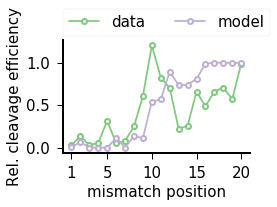

In [308]:
publishable.set_figsize(n_columns=1,n_rows=1)
sns.set_palette('Accent')


plt.plot(single_mm['target - MMpos'], single_mm['Score'], 
        marker='o',
        markersize=5,
        markeredgewidth=2,
        markerfacecolor='white',
        label= 'data')

two_mismatches = np.zeros((20,20))


one_mm = np.zeros(20)
for mm1 in range(20):
    mismatch_positions = [mm1+1]
    Delta = CRISPR.translate_binding_to_cleaving(parameters, model_id, rate_to_cleave, mismatch_positions)
    landscape = CRISPR.get_transition_landscape(Delta)
    one_mm[mm1] = CRISPR.Pclv(Delta)/on_target
    
plt.plot(range(1,21),one_mm,
        marker='o',
        markersize=5,
        markeredgewidth=2,
        markerfacecolor='white',
        label='model')


plt.legend(fontsize=15,frameon=True,ncol=2, bbox_to_anchor=(.15,.5,1,0.85))
plt.xticks([1,5,10,15,20],fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('Rel. cleavage efficiency', fontsize=15)
plt.xlabel('mismatch position', fontsize=15)
sns.despine()

plt.savefig('../data/BN_forum_22_10_2018/From_Boyle_to_Pattanayak_single_mm.png',format='png',bbox_inches='tight',dpi=300)

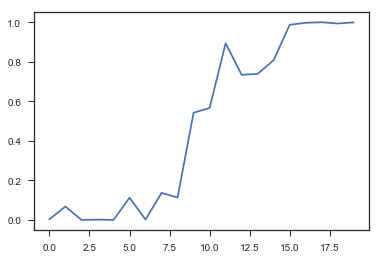